# Import necessary libraries for building models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

dataset = pd.read_csv('creditcard.csv')
RANDOM_STATE = 0

# Analyzing the dataset to make decision for building model

In [2]:
# The info show us that there are no null value
# Therefore, we does not have to treat the null value.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Check the percentage of fraud and non-fraud transaction
non_fraud_trans = dataset['Class'].value_counts()[0] # number of non-fraud transaction 
fraud_trans = dataset['Class'].value_counts()[1] # number of fraud transaction
total_trans = len(dataset) # total number of transactions in the whole datasets
print('No Frauds =', non_fraud_trans, "which equal", round(non_fraud_trans/total_trans * 100, 2), '% of the dataset')
print('Frauds =', fraud_trans, "which equal", round(fraud_trans/total_trans * 100,2), '% of the dataset')

# The result show us that the dataset for credit card fraud is really imbalanced 
# because we have 99.83% of the dataset is non-fraudulent 
# and only 0.17% of the dataset is fradulent transaction

No Frauds = 284315 which equal 99.83 % of the dataset
Frauds = 492 which equal 0.17 % of the dataset


<AxesSubplot:title={'center':'Distribution of Time'}, xlabel='Time', ylabel='Density'>

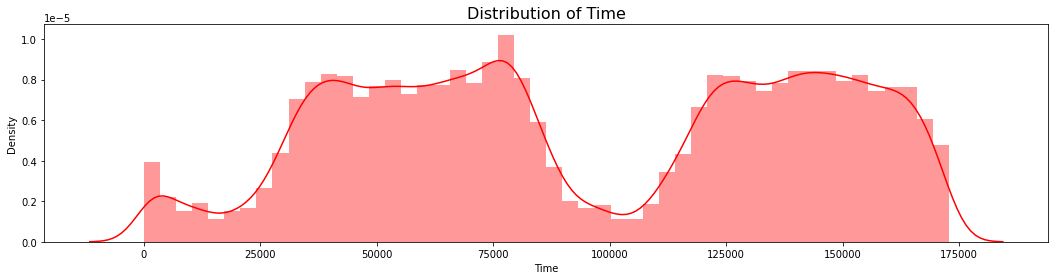

In [5]:
plt.figure(figsize=(18,4))
plt.title('Distribution of Time', fontsize = 16)
sns.distplot(dataset.Time, color = 'r')

<AxesSubplot:title={'center':'Distribution of Amount'}, xlabel='Amount', ylabel='Density'>

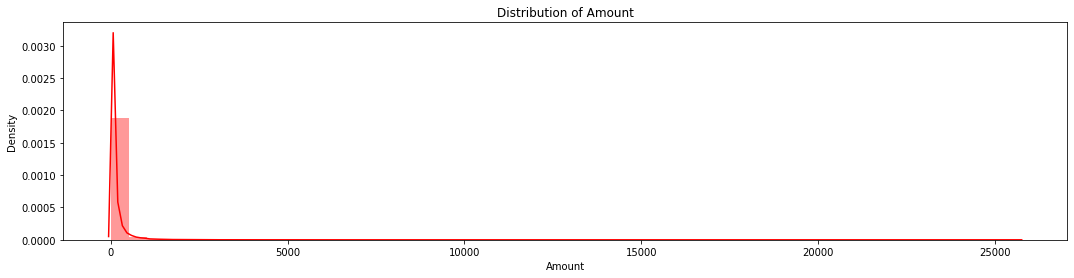

In [6]:
plt.figure(figsize=(18,4))
plt.title('Distribution of Amount')
sns.distplot(dataset.Amount, color = 'r')

# Preprocessing Technique
1. Scaling and Distributing
2. Spliting dataset

In [7]:
# Scaling and Distributing
# Since the whole dataset is already scaled except for the time and amount
# thus we have to scale the time and amount columns of the dataset before we working on building models

std_scaler = StandardScaler()

dataset.insert(0, 'scaled_amount', std_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1)))
dataset.insert(1, 'scaled_time', std_scaler.fit_transform(dataset['Time'].values.reshape(-1,1)))

In [8]:
dataset.drop(['Amount','Time'], axis = 1, inplace = True)

In [9]:
dataset.head() # Use this to make visualize the datset after the modification above

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [10]:
X = dataset.iloc[:, dataset.columns != 'Class']
y = dataset['Class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = RANDOM_STATE)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = RANDOM_STATE)

# Use simple parameter for Learning Algorithm on the imbalance dataset to prove that the model will be overfiting if we don't use the resample training set

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Use Logistic Regression on original dataset
lr = LogisticRegression(random_state = RANDOM_STATE).fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)

# User Random Forest on undersample dataset
rfc = RandomForestClassifier(random_state = RANDOM_STATE).fit(X_train, y_train)
y_rf_pred = rfc.predict(X_test)

# Use confusion matrix to visualize the original dataset

In [13]:
from sklearn.metrics import confusion_matrix

# Logistic Regression confusion matrix
lr_cm = confusion_matrix(y_test, y_lr_pred)

# Random Forest confusino matrix
rf_cm = confusion_matrix(y_test, y_rf_pred)

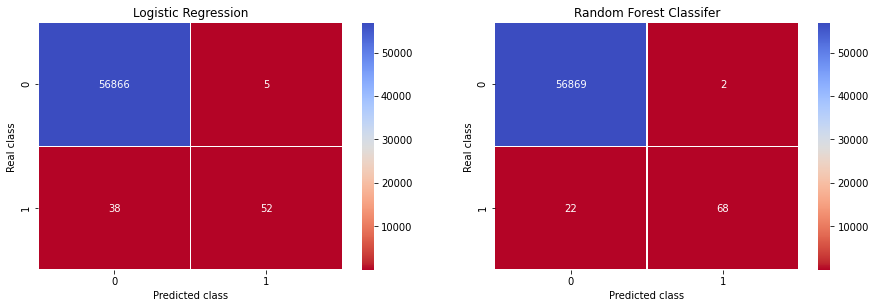

In [14]:
fig= plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(2,2,1)
sns.heatmap(lr_cm, cmap="coolwarm_r",annot=True, fmt = "", linewidths=0.5)
plt.title("Logistic Regression")
plt.xlabel("Predicted class")
plt.ylabel("Real class")

ax2 = fig.add_subplot(2,2,2)
sns.heatmap(rf_cm, cmap="coolwarm_r",annot=True, fmt = "", linewidths=0.5)
plt.title("Random Forest Classifer")
plt.xlabel("Predicted class")
plt.ylabel("Real class")

plt.show()

# TN = 0,0 no. of normal transaction which are predited normal
# FP = 0,1 no of normal transaction which are predicted fraud
# FN = 1,0 no of fraud Transaction which are predicted normal
# TP = 1,1 no of fraud transaction which are predicted fraud

In [15]:
from sklearn.metrics import classification_report

print("\t\t Overfitting Log Regression \n\n",classification_report(y_test, y_lr_pred))

print("\t\t Overfitting RF \n\n",classification_report(y_test, y_rf_pred))

		 Overfitting Log Regression 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.91      0.58      0.71        90

    accuracy                           1.00     56961
   macro avg       0.96      0.79      0.85     56961
weighted avg       1.00      1.00      1.00     56961

		 Overfitting RF 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.97      0.76      0.85        90

    accuracy                           1.00     56961
   macro avg       0.99      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961



In [16]:
# This is still preprocessing datatset
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority') 
X_train_us, y_train_us= undersample.fit_resample(X_train, y_train) 

# Use GridSearchCV to find the best parameters for each classifier on the resample dataset

1. Find the best parameters for Logistic Regression on resampled datasset

In [17]:
from sklearn.model_selection import GridSearchCV

lr_params = {"penalty": ['l1', 'l2'], 
             'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_lr = GridSearchCV(LogisticRegression(), lr_params)

grid_lr.fit(X_train_us, y_train_us)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [18]:
grid_lr.best_params_

{'C': 0.01, 'penalty': 'l2'}

2. Find the best parameters for Support Vector Machine on original dataset and resampled dataset

In [19]:
rf_params = {'n_estimators': [8, 16, 64, 200],
             'max_depth': [None,10,50,200,1000]}

grid_rf = GridSearchCV(RandomForestClassifier(), rf_params)

grid_rf.fit(X_train_us, y_train_us)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 50, 200, 1000],
                         'n_estimators': [8, 16, 64, 200]})

In [20]:
grid_rf.best_params_

{'max_depth': 1000, 'n_estimators': 200}

# Fit the dataset with the classifier

1. Fit train dataset on Logistic Regression Classifier

In [21]:
lr = LogisticRegression(C = 0.01, penalty ='l2', random_state=RANDOM_STATE)
lr.fit(X_train_us, y_train_us)
y_lr_pred = lr.predict(X_test)

2. Fit train dataset on Random Forest

In [22]:
rf = RandomForestClassifier(max_depth = None, n_estimators = 16)
rf.fit(X_train_us, y_train_us)
y_rf_pred = rf.predict(X_test)

In [40]:
from sklearn.model_selection import cross_val_score

lr_cv_score = cross_val_score(lr, X_train_us, y_train_us, cv=5)

print("Logistic Regression has",round(lr_cv_score.mean(), 2) * 100, "% cross validation score")

rf_cv_score = cross_val_score(rf, X_train_us, y_train_us, cv=5)

print("Random Forest Classifier has",round(rf_cv_score.mean(), 2) * 100, "% cross validation score")

Logistic Regression has 94.0 % cross validation score
Random Forest Classifier has 93.0 % cross validation score


# Use confusion matrix for visualization

In [24]:
from sklearn.metrics import confusion_matrix

# Logistic Regression confusion matrix
lr_cm = confusion_matrix(y_test, y_lr_pred)

# Support Vector Classififer confusion matrix
rf_cm = confusion_matrix(y_test, y_rf_pred)

In [44]:
lr_cm

array([[56213,   658],
       [   14,    76]], dtype=int64)

In [45]:
rf_cm

array([[55287,  1584],
       [   13,    77]], dtype=int64)

In [42]:
print("\t\t Resampled Log Regression \n\n",classification_report(y_test, y_lr_pred))

print("\t\t Resampled Random Forest \n\n",classification_report(y_test, y_rf_pred))

		 Resampled Log Regression 

               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56871
           1       0.10      0.84      0.18        90

    accuracy                           0.99     56961
   macro avg       0.55      0.92      0.59     56961
weighted avg       1.00      0.99      0.99     56961

		 Resampled Random Forest 

               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56871
           1       0.05      0.86      0.09        90

    accuracy                           0.97     56961
   macro avg       0.52      0.91      0.54     56961
weighted avg       1.00      0.97      0.98     56961



In [51]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)): 
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10), sharey=True)

    if ylim is not None:
        plt.ylim(*ylim)

    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    ax1.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="#ff9124", label="Training score")
    ax1.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="#2492ff", label="Cross-validation score")

    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve( estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    ax2.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="#ff9124", label="Training score")
    ax2.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="#2492ff", label="Cross-validation score")

    ax2.set_title("Random Forest Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

    return plt

<module 'matplotlib.pyplot' from 'D:\\Python\\lib\\site-packages\\matplotlib\\pyplot.py'>

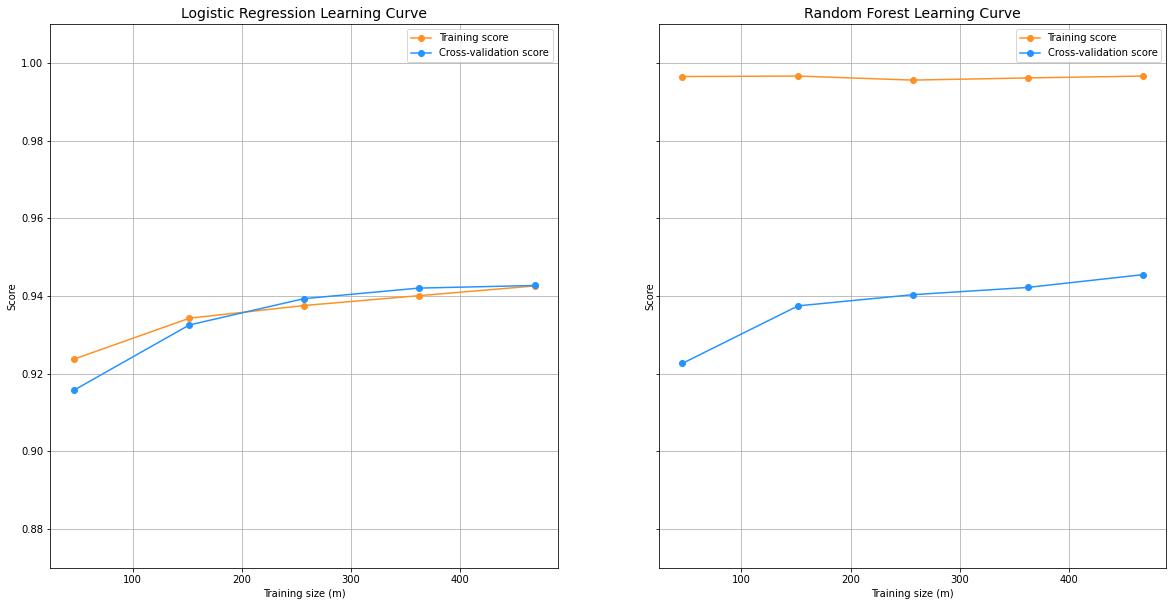

In [52]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(lr, rf, X_train_us, y_train_us, (0.87, 1.01), cv=cv, n_jobs=2)

In [29]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train_us.shape[1]

nn_model = keras.models.Sequential([
    keras.layers.Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    keras.layers.Dense(32, activation = "relu"),
    keras.layers.Dense(2, activation = "softmax")
])

In [30]:
nn_model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
epoch = 20

history = nn_model.fit(X_train_us, y_train_us, validation_data=(X_val,y_val), batch_size=25, epochs = epoch, shuffle=True, verbose=2)

Epoch 1/20
24/24 - 2s - loss: 0.5391 - accuracy: 0.5956 - val_loss: 0.6786 - val_accuracy: 0.6388
Epoch 2/20
24/24 - 2s - loss: 0.3445 - accuracy: 0.8771 - val_loss: 0.4628 - val_accuracy: 0.9192
Epoch 3/20
24/24 - 2s - loss: 0.2622 - accuracy: 0.9437 - val_loss: 0.3296 - val_accuracy: 0.9759
Epoch 4/20
24/24 - 2s - loss: 0.2143 - accuracy: 0.9488 - val_loss: 0.2621 - val_accuracy: 0.9807
Epoch 5/20
24/24 - 2s - loss: 0.1786 - accuracy: 0.9522 - val_loss: 0.2003 - val_accuracy: 0.9835
Epoch 6/20
24/24 - 2s - loss: 0.1560 - accuracy: 0.9522 - val_loss: 0.1696 - val_accuracy: 0.9815
Epoch 7/20
24/24 - 2s - loss: 0.1385 - accuracy: 0.9522 - val_loss: 0.1516 - val_accuracy: 0.9794
Epoch 8/20
24/24 - 2s - loss: 0.1249 - accuracy: 0.9539 - val_loss: 0.1417 - val_accuracy: 0.9777
Epoch 9/20
24/24 - 2s - loss: 0.1128 - accuracy: 0.9573 - val_loss: 0.1401 - val_accuracy: 0.9735
Epoch 10/20
24/24 - 2s - loss: 0.1041 - accuracy: 0.9608 - val_loss: 0.1278 - val_accuracy: 0.9744
Epoch 11/20
24/24 -

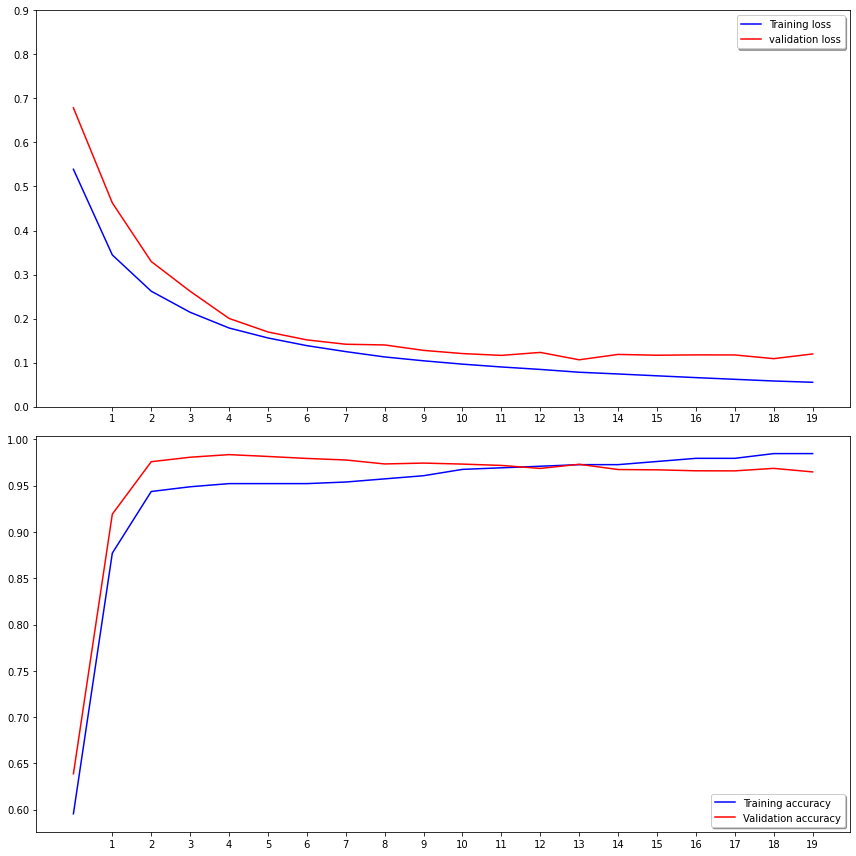

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epoch, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.legend(loc='best', shadow=True)

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epoch, 1))
ax2.legend(loc='best', shadow=True)

plt.tight_layout()
plt.show()

(0.0, 1.0)

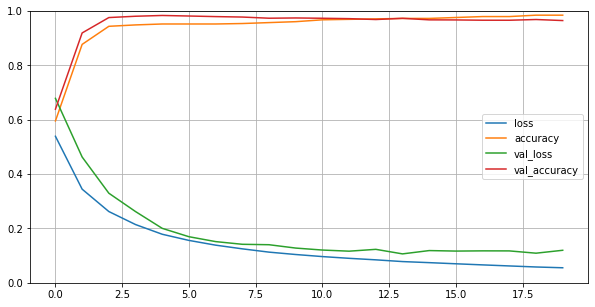

In [34]:
pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)



In [41]:
history.model.evaluate(X_test, y_test)

1781/1781 [==============================] - 1s 841us/step - loss: 0.1160 - accuracy: 0.9660


[0.11600951850414276, 0.9659942984580994]